In [ ]:
pip install yfinance --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.54
    Uninstalling yfinance-0.2.54:
      Successfully uninstalled yfinance-0.2.54


In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from pandas.plotting import table

In [ ]:
# save_dir = '/content/drive/MyDrive/TA/64-64_100_32'
# plot_dir = os.path.join(save_dir, 'plot')

In [ ]:
tickers = [
    'ACES.JK', 'ADMR.JK', 'ADRO.JK', 'AKRA.JK', 'AMMN.JK', 'AMRT.JK', 'ANTM.JK',
    'ARTO.JK', 'ASII.JK', 'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BBTN.JK', 'BMRI.JK',
    'BRIS.JK', 'BRPT.JK', 'CPIN.JK', 'CTRA.JK', 'ESSA.JK', 'EXCL.JK', 'GOTO.JK',
    'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INKP.JK', 'ISAT.JK', 'ITMG.JK', 'JPFA.JK',
    'JSMR.JK', 'KLBF.JK', 'MAPA.JK', 'MAPI.JK', 'MBMA.JK', 'MDKA.JK', 'MEDC.JK',
    'PGAS.JK', 'PGEO.JK', 'PTBA.JK', 'SIDO.JK', 'SMGR.JK', 'SMRA.JK', 'TLKM.JK',
    'TOWR.JK', 'UNTR.JK', 'UNVR.JK'
]

In [ ]:
# Range Data
end_date = datetime(2024, 12, 31)
start_date = datetime(2020, 1, 1)

# Download dari yfinance
data_frames = []
for ticker in tickers:
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    df = df[['Close']].rename(columns={'Close': ticker})
    data_frames.append(df)

# Combine df
combined_df = pd.concat(data_frames, axis=1)

# Simpan ke csv
combined_df.to_csv("LQ45_stocks_close_data20-24.csv", index_label='Date')
print("Data has been saved to LQ45_stocks_close_data.csv")

Data has been saved to LQ45_stocks_close_data.csv


In [ ]:
# Membaca file Excel
data = pd.read_csv('LQ45_stocks_close_data20-24.csv', parse_dates=['Date'], index_col='Date')
print(f"Sisa saham sebelum filter: {data.shape[1]}")
print(f"Jumlah baris (tanggal): {data.shape[0]}")

# Hapus kolom (saham) yang memiliki kurang dari 90% data
threshold = 0.9 * len(data)
data = data.loc[:, data.notnull().sum() > threshold]

# Isi missing value dengan forward fill (per kolom)
data.fillna(method='ffill', inplace=True)

# Drop baris (tanggal) yang masih ada NaN
data.dropna(inplace=True)

print(f"Sisa saham setelah filter: {data.shape[1]}")
print(f"Jumlah baris (tanggal): {data.shape[0]}")
print(data.head())

Sisa saham sebelum filter: 45
Jumlah baris (tanggal): 1211
Sisa saham setelah filter: 40
Jumlah baris (tanggal): 1211
                               ACES.JK     ADRO.JK     AKRA.JK     AMRT.JK  \
Date                                                                         
2020-01-02 00:00:00+07:00  1303.204346  504.317932  573.369019  811.146057   
2020-01-03 00:00:00+07:00  1307.519531  516.834717  557.197083  801.875793   
2020-01-06 00:00:00+07:00  1268.682373  516.834717  535.144531  783.335205   
2020-01-07 00:00:00+07:00  1242.790894  543.294006  518.972412  778.700195   
2020-01-08 00:00:00+07:00  1216.899292  530.946350  523.383057  792.605591   

                              ANTM.JK     ARTO.JK      ASII.JK      BBCA.JK  \
Date                                                                          
2020-01-02 00:00:00+07:00  724.159363  386.820343  4718.496094  5820.927246   
2020-01-03 00:00:00+07:00  732.780334  386.820343  4769.970215  5916.638184   
2020-01-06 00:00:00

<ipython-input-6-9b93c9300640>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Mengecek jumlah data kosong di setiap kolom
print(data.isnull().sum())

# Menghitung jumlah baris
jumlah_baris = len(data)

print("Jumlah baris:", jumlah_baris)

ACES.JK    0
ADRO.JK    0
AKRA.JK    0
AMRT.JK    0
ANTM.JK    0
ARTO.JK    0
ASII.JK    0
BBCA.JK    0
BBNI.JK    0
BBRI.JK    0
BBTN.JK    0
BMRI.JK    0
BRIS.JK    0
BRPT.JK    0
CPIN.JK    0
CTRA.JK    0
ESSA.JK    0
EXCL.JK    0
ICBP.JK    0
INCO.JK    0
INDF.JK    0
INKP.JK    0
ISAT.JK    0
ITMG.JK    0
JPFA.JK    0
JSMR.JK    0
KLBF.JK    0
MAPA.JK    0
MAPI.JK    0
MDKA.JK    0
MEDC.JK    0
PGAS.JK    0
PTBA.JK    0
SIDO.JK    0
SMGR.JK    0
SMRA.JK    0
TLKM.JK    0
TOWR.JK    0
UNTR.JK    0
UNVR.JK    0
dtype: int64
Jumlah baris: 1211


In [ ]:
def preprocess_saham(data, ticker, window_size=30):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data[[ticker]])

    X, y = [], []
    for i in range(window_size, len(scaled)):
        X.append(scaled[i-window_size:i, 0])
        y.append(scaled[i, 0])

    X = np.array(X).reshape(-1, window_size, 1)
    y = np.array(y)
    return X, y, scaler

In [ ]:
def build_model(window_size):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(window_size, 1)))
    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

window_size = 30
hasil_prediksi = {}
error_metrik = {}
scaler_dict = {}

for ticker in data.columns:
    print(f"Memproses saham: {ticker}")
    X, y, scaler = preprocess_saham(data, ticker, window_size)
    scaler_dict[ticker] = scaler

    # Split data: 70% train, 15% val, 15% test
    train_size = int(0.7 * len(X))
    val_size = int(0.15 * len(X))

    X_train = X[:train_size]
    y_train = y[:train_size]
    X_val = X[train_size:train_size+val_size]
    y_val = y[train_size:train_size+val_size]
    X_test = X[train_size+val_size:]
    y_test = y[train_size+val_size:]

    model = build_model(window_size)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
              validation_data=(X_val, y_val), verbose=0)

    # save model ke drive
    # model.save(f"{save_dir}/model_{ticker}.h5")

    y_pred = model.predict(X_test)

    # Inverse transform
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

    hasil_prediksi[ticker] = y_pred_inv.flatten()
    error_metrik[ticker] = {
        'RMSE': np.sqrt(mean_squared_error(y_test_inv, y_pred_inv)),
        'MAE': mean_absolute_error(y_test_inv, y_pred_inv)
    }

    pred = hasil_prediksi[ticker]
    scaler = scaler_dict[ticker]

    # Ambil data aktual terakhir sebanyak panjang prediksi
    actual_full = data[ticker].dropna().values.reshape(-1, 1)
    actual_cut = actual_full[-len(pred):]

    plt.figure(figsize=(10, 5))
    plt.plot(actual_cut, label='Aktual')
    plt.plot(pred, label='Prediksi')
    plt.title(f'Prediksi vs Aktual Harga Saham {ticker}')
    plt.xlabel('Hari')
    plt.ylabel('Harga')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(f"{plot_dir}/plot_{ticker}.png")
    plt.close()

    # with open(f"{save_dir}/scaler_dict.pkl", 'wb') as f:
    #   pickle.dump(scaler_dict, f)


Memproses saham: ACES.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: ADRO.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
Memproses saham: AKRA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
Memproses saham: AMRT.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: ANTM.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step
Memproses saham: ARTO.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
Memproses saham: ASII.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Memproses saham: BBCA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step
Memproses saham: BBNI.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: BBRI.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: BBTN.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Memproses saham: BMRI.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Memproses saham: BRIS.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Memproses saham: BRPT.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Memproses saham: CPIN.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Memproses saham: CTRA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Memproses saham: ESSA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
Memproses saham: EXCL.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step
Memproses saham: ICBP.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
Memproses saham: INCO.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
Memproses saham: INDF.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Memproses saham: INKP.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Memproses saham: ISAT.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
Memproses saham: ITMG.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: JPFA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
Memproses saham: JSMR.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step
Memproses saham: KLBF.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Memproses saham: MAPA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Memproses saham: MAPI.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Memproses saham: MDKA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Memproses saham: MEDC.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Memproses saham: PGAS.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Memproses saham: PTBA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Memproses saham: SIDO.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
Memproses saham: SMGR.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Memproses saham: SMRA.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
Memproses saham: TLKM.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Memproses saham: TOWR.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Memproses saham: UNTR.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Memproses saham: UNVR.JK


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


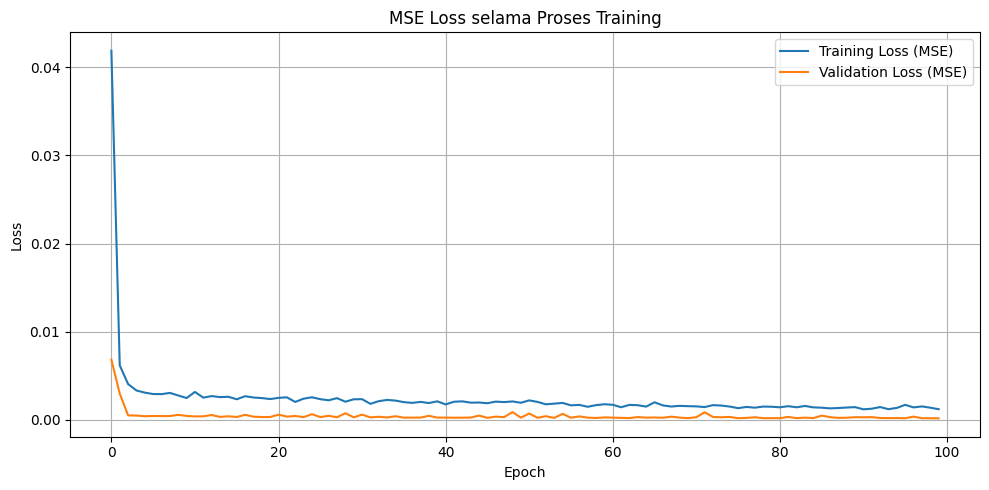

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('MSE Loss selama Proses Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# plt.savefig(f"{save_dir}/loss_plot.png")

In [ ]:
# Buat DataFrame untuk ringkasan
ringkasan_error = []

for ticker, err in error_metrik.items():
    if ticker in data.columns:
        harga_rata2 = data[ticker].mean()
        mae_pct = (err['MAE'] / harga_rata2) * 100
        rmse_pct = (err['RMSE'] / harga_rata2) * 100

        ringkasan_error.append({
            'Saham': ticker,
            'Harga Rata-rata': round(harga_rata2, 2),
            'MAE': round(err['MAE'], 2),
            'MAE (%)': round(mae_pct, 2),
            'RMSE': round(err['RMSE'], 2),
            'RMSE (%)': round(rmse_pct, 2)
        })

# Ubah jadi DataFrame
df_ringkasan = pd.DataFrame(ringkasan_error)
df_ringkasan = df_ringkasan.sort_values(by='MAE (%)')  # urutkan dari yang paling akurat

# Tampilkan
print(df_ringkasan.to_string(index=False))

# df_ringkasan.to_csv(f"{save_dir}/evaluasi_ringkasan.csv", index=False)

  Saham  Harga Rata-rata    MAE  MAE (%)   RMSE  RMSE (%)
TOWR.JK           925.60  10.71     1.16  14.37      1.55
EXCL.JK          2226.77  26.58     1.19  38.40      1.72
CPIN.JK          5324.34  65.31     1.23  88.59      1.66
INDF.JK          6004.73  84.05     1.40 111.33      1.85
ASII.JK          4366.77  62.04     1.42  78.68      1.80
TLKM.JK          2984.40  43.27     1.45  56.16      1.88
INCO.JK          4863.48  72.84     1.50 102.72      2.11
INKP.JK          8296.35 129.80     1.56 170.12      2.05
UNVR.JK          4268.25  66.46     1.56  85.81      2.01
SIDO.JK           619.33   9.78     1.58  12.33      1.99
ACES.JK           961.20  15.27     1.59  20.18      2.10
BBTN.JK          1192.15  19.30     1.62  25.26      2.12
KLBF.JK          1523.80  25.26     1.66  31.68      2.08
SMRA.JK           648.42  11.13     1.72  14.04      2.16
ARTO.JK          5903.11 104.81     1.78 124.39      2.11
SMGR.JK          6748.21 123.04     1.82 144.74      2.14
MDKA.JK       

In [ ]:

# with open(f"{save_dir}/hasil_prediksi.pkl", 'wb') as f:
#     pickle.dump(hasil_prediksi, f)

# with open(f"{save_dir}/error_metrik.pkl", 'wb') as f:
#     pickle.dump(error_metrik, f)